In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from mpl_interactions import image_segmenter 
import ipywidgets as widgets

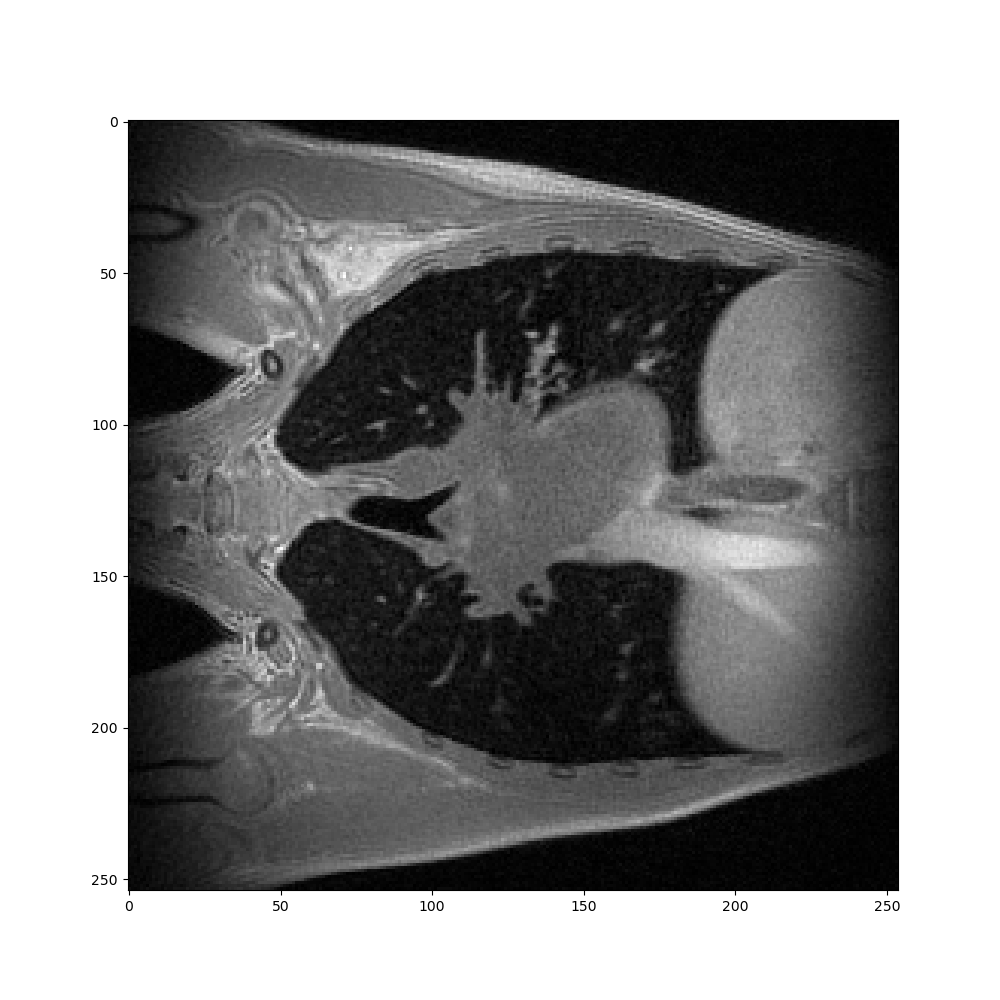

In [24]:
slice_2d = mpimg.imread('../../data/imrh_114a/slices/lammy0_slice120.png')

N_classes = 4
class_selector = widgets.Dropdown(options=list(range(1, N_classes + 1)), description="class")


def update(change):
    multi_class_segmenter.current_class = class_selector.value
    multi_class_segmenter.erasing = erasing_button.value


erasing_button = widgets.Checkbox(value=False, description="Erasing")
erasing_button.observe(update, names="value")

class_selector.observe(update, names="value")
multi_class_segmenter = image_segmenter(slice_2d, nclasses=4, mask_alpha=0.65)
display(widgets.HBox([erasing_button, class_selector]))
display(multi_class_segmenter)

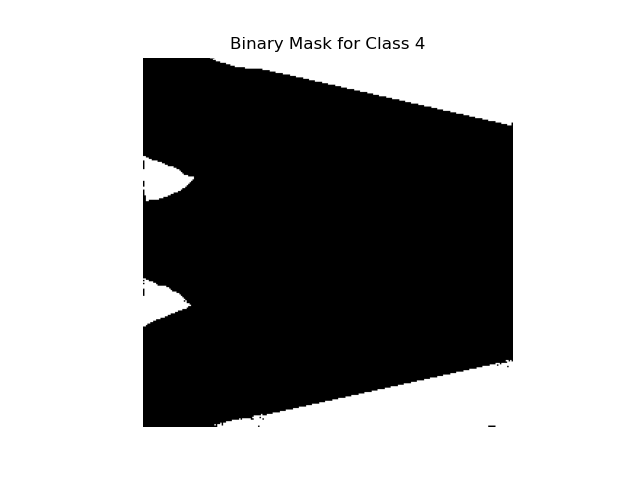

In [31]:
desired_class = 4
binary_mask = np.where(multi_class_segmenter.mask == desired_class, 1, 0)
plt.figure()
plt.imshow(binary_mask, cmap='gray')
plt.title(f"Binary Mask for Class {desired_class}")
plt.axis('off')
plt.show()

In [34]:
np.save("imrh_114a.npy",multi_class_segmenter.mask)

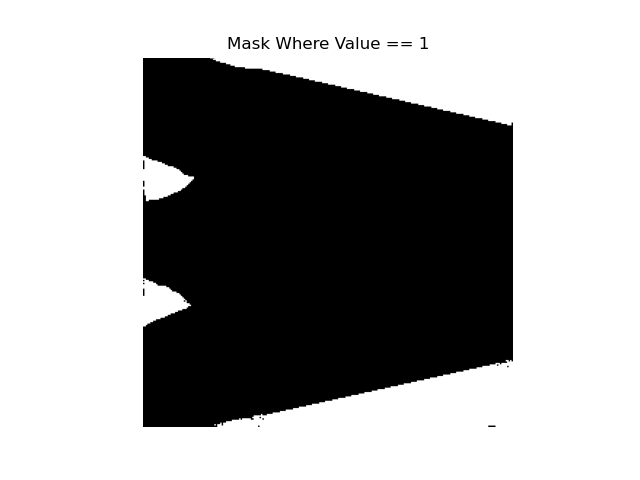

In [81]:
combined_mask = np.load('masks/imrh_114a/imrh_114a.npy')
mask_equals_1 = (combined_mask == 4).astype(np.uint8)  # Convert boolean to 0 and 1

# Plot the binary mask
plt.imshow(mask_equals_1, cmap='gray')
plt.axis('off')  # Turn off the axis for a cleaner visualization
plt.show()

In [82]:
def get_rbg_img(path):
    img = mpimg.imread(path)
    # get RGB channel ref = 3
    rgb_img = img[:, :, :3] 
    rgb_img = rgb_img / np.amax(rgb_img)
    return(rgb_img)


def asnr(img, mask):
    # calculate std and mean
    img_p = img[mask==1] # parenchyma
    img_a = img[mask==3] # aorta
    img_t = img[mask==2] # trachea
    img_b = img[mask==4] # background
        
    # calculate SNR
    p_snr = np.mean(img_p) / np.std(img_b)
    a_snr = np.mean(img_a) / np.std(img_b)
    t_snr = np.mean(img_t) / np.std(img_b)
    
    return p_snr, a_snr, t_snr

In [ ]:
slice_path = '../../data/imrh_114a/slices/lammy0_slice120.png'
combined_mask = np.load('masks/imrh_114a/imrh_114a.npy')
rgb_img = get_rbg_img(slice_path)

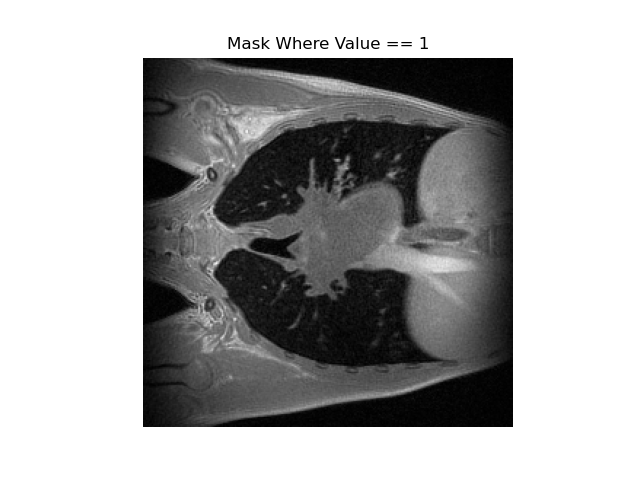

In [83]:
slice_path = '../../data/imrh_114a/slices/lammy0_slice120.png'
rgb_img = get_rbg_img(slice_path)
plt.imshow(rgb_img)
plt.show()